# Experiments on the PhD Exchange Network
# This code reproduces the results in the Book Chapter
##  https://arxiv.org/abs/1906.06366

### Dane Taylor, 4 January 2021


In [1]:
%pylab inline
import networkx as nx
import seaborn as sns
from scipy import sparse
import sys,os

Populating the interactive namespace from numpy and matplotlib


## 1. Set up folders for code, data, and figures

In [2]:
# folder containing supracentrality codes
code_folder = '../supracentrality/' 
sys.path.append(code_folder)

In [3]:
from supracentrality import *
from load_PhD_exchange import *

In [4]:
# folder containing data
data_folder = '../data/PhD Exchange Network Data' 

# folder where to save figures
fig_folder = 'PhD_Exchange_figs' 
if os.path.isdir(fig_folder)==False: os.mkdir(fig_folder) 

## 2. Load and visualize PhD Exchange data
### https://sites.google.com/site/danetaylorresearch/data



#### First, for visualization purposes, create a network that aggregates all data into a single network


In [5]:
PhD_graph = load_PhD_flow_graph(data_folder)
# spy(PhD_graph['A'])
# print(PhD_graph['A'],'22222222')
# print(PhD_graph['A'].shape[0],'333333333333')


../supracentrality/load_PhD_exchange.py:91: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  graph['A'][int(edge[0])-1,int(edge[1])-1] += edge[2]


Loaded network with:
231 nodes
1711 edges


In [6]:
# COMPUTE REVERSE PAGERANK
x = pagerank(PhD_graph['A'].T,0.85)
top10_ids = argsort(-x)[:10]
print(top10_ids)
print()
print(x[top10_ids])

[ 89 130  51  38  77  24 133 201  13 152]

[0.07351978 0.06874558 0.06819198 0.0588795  0.05802005 0.03492026
 0.03219814 0.03110193 0.02845137 0.02843648]


In [7]:
top10_schools = [ PhD_graph['nodenames'][idd] for idd in top10_ids ]
top10_schools

['Stanford University',
 'University of California, Berkeley',
 'Massachusetts Institute of Technology',
 'Harvard University',
 'Princeton University',
 'Cornell University',
 'University of California, Los Angeles',
 'University of Wisconsin-Madison',
 'Carnegie Mellon University',
 'University of Illinois at Urbana-Champaign']

#### Visualize network containing all PhD exchanges with node size/color indicating PageRank

In [8]:
def visualize_network(A,labbels,show_labels,show_floating_nodes):
    A = A.todense()
    ids = range(len(A))
#     print(ids,'ids33333') 
    if ~show_floating_nodes:
        N_temp  = len(A)
        ids = np.where(np.sum(A,1))[0]
        A = A[ids,:]
        A = A[:,ids]  
        labbels = [labbels[i] for i in ids]
#     print(ids,'ids666666') 
    G = nx.from_numpy_matrix(A)
    x = abs(np.array(list(nx.pagerank(G, alpha=0.85).values()))) + 10**-14
    pos = pos = nx.kamada_kawai_layout(G)


    fig = figure(figsize=(15,15));
    nodes = nx.draw_networkx_nodes(G, pos,alpha=.4,node_size=x*10**4,node_color=x,cmap='hot')
    edges = nx.draw_networkx_edges(G, pos,alpha=.2,width=.5)
    
    if show_labels:
        labels = {}
        for j in range(len(labbels)):
            labels[j] = labbels[j]
        labels2 = nx.draw_networkx_labels(G, pos,labels,font_size=8,alpha=0.5);
#     print(ids,'ids') 
#     print(len(ids),'len')
    plt.axis('off');
#     savefig("source_nodes.png")
    print('visualizing '+ str(len(ids)) + ' nodes' )    
    return

visualizing 169 nodes


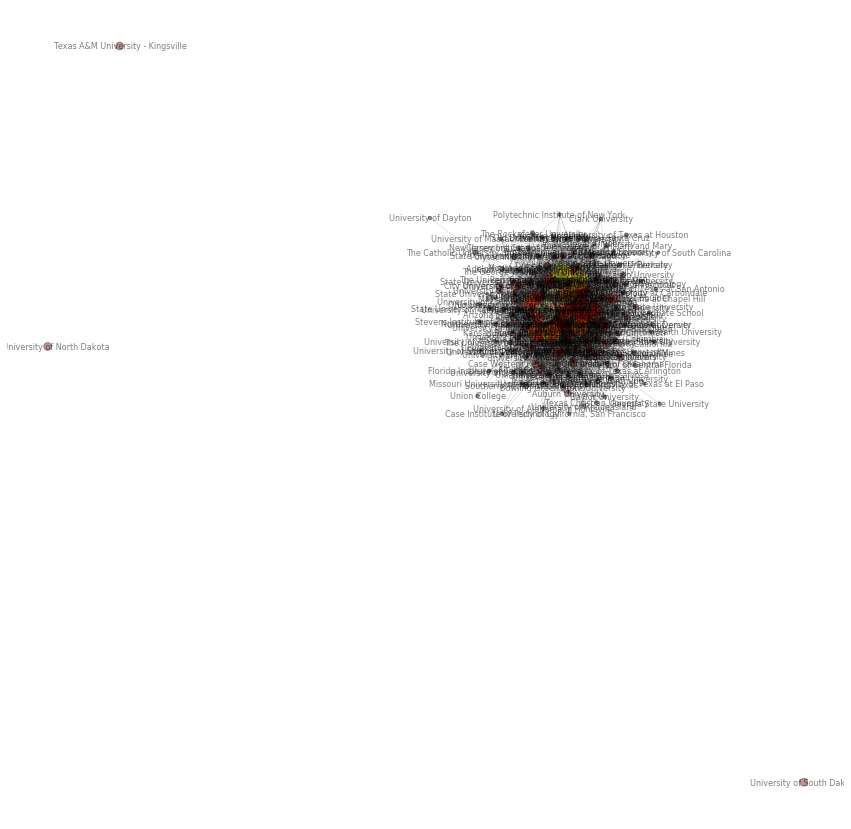

In [9]:
show_labels = True
show_floating_nodes = False
visualize_network(PhD_graph['A'],PhD_graph['nodenames'],show_labels,show_floating_nodes)   #这里可视化的节点数量169是源节点的个数，
#而且源节点的id是原始数据中的节点id减去1
savefig("source_nodes.png")

#### Now, create a temporal network with each time layer encoding PhD exchanges for a given year

In [10]:
temporal_PhD_graph = load_temporal_PhD_flow_graph(data_folder)
# print(temporal_PhD_graph)

../supracentrality/load_PhD_exchange.py:53: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  graph['A_tensor'][year_id][node_A,node_B] += weight


year = 1976

visualizing 59 nodes


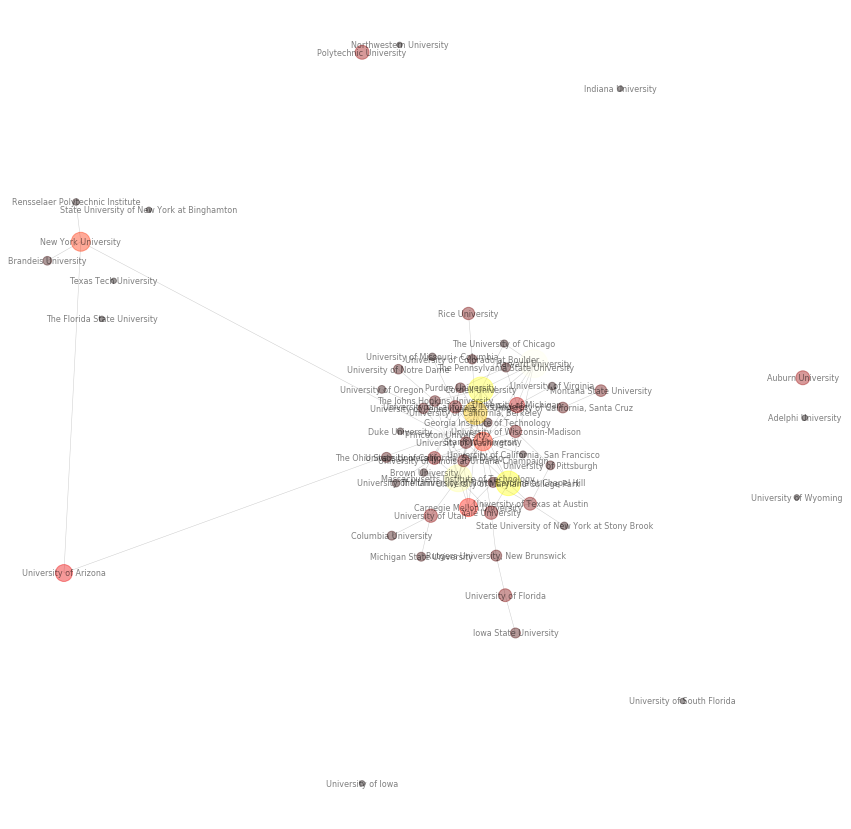

In [11]:
year_id = 30
show_labels = True
show_floating_nodes = False
print('year = '+ str(temporal_PhD_graph['layer_names'][year_id]).rstrip('.0')+'\n')
visualize_network(temporal_PhD_graph['A_tensor'][year_id],temporal_PhD_graph['nodenames'],show_labels,show_floating_nodes)
savefig("year_nodes_1976.png")

## 4. Study supracentrality for temporal network encoding PhD exchanges

In [17]:
M = [A.T for A in temporal_PhD_graph['A_tensor']] #Loads temporal graph
# At = undirected_chain(len(M))
gamma = .01
At = directed_chain(len(M),gamma)

In [18]:
def plotter(c,c2,omega,alpha,ids):
    names = ['joint supracentrality','conditional centrality']
    fig = plt.figure(figsize = (17,5))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    for n in ids:
#         print(temporal_PhD_graph['layer_names'],'1111111')
        ax1.plot(temporal_PhD_graph['layer_names'],c[n]);
    ax1.legend(['Harvard', 'MIT', 'Princeton', 'Stanford', 'UC Berkeley']);
    ax1.set_xticks(['1946.0','1966.0','1986.0','2006.0']);
    ax1.set_xlabel('layer $t$');
    ax1.set_ylabel(names[0]);
    ax1.set_title(names[0]+', omega='+str(omega)+', alpha='+str(alpha)+'');
#     plt.xticks(rotation=60)
    for n in ids:
        ax2.plot(temporal_PhD_graph['layer_names'],c2[n]);
    ax2.legend(['Harvard', 'MIT', 'Princeton', 'Stanford', 'UC Berkeley']);
    ax2.set_xticks(['1946.0','1966.0','1986.0','2006.0']);
    ax2.set_xlabel('layer $t$');
    ax2.set_ylabel(names[1]);
    ax2.set_title(names[1]+', omega='+str(omega)+', alpha='+str(alpha)+'');    
#     plt.xticks(rotation=60)
    return

In [19]:
#for the centrality matrix, use the Google matrix transpose
centrality_matrix_type = 'pagerank' # or adjacency, or hub, authority

if centrality_matrix_type == 'adjacency':
    centrality_function = lambda A: A.todense()
    
if centrality_matrix_type == 'pagerank':
    alpha=0.85
    centrality_function = lambda A: google_matrix(A,alpha=alpha).T

if centrality_matrix_type == 'hub':
    centrality_function = lambda A: np.dot(A.todense(),A.todense().T)

if centrality_matrix_type == 'authority':
    centrality_function = lambda A: np.dot(A.todense().T,A.todense())

#centrality_function(M[1])

(231, 61)


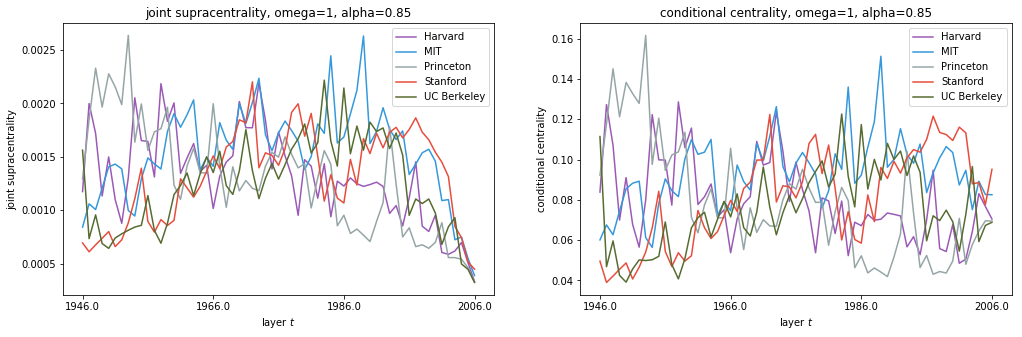

In [20]:
omega = 1

ids = [38,51,77,89,130]

joints = supraCentrality(M,At,omega,centrality_function)
marginals,conditionals = get_marginal_and_conditional(joints)
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#556B2F"]
# flatui = ["#2878B5", "#82B0D2", "#F8AC8C", "#C82423", "#96C37D"]
with sns.color_palette(flatui): 
# with sns.color_palette("Paired"): 
    plotter(joints,conditionals,omega,alpha,ids)
    savefig("joint_supracen_undirect_omega=1.png")

In [16]:
# add

In [21]:
# omega = 0.01

joints = supraCentrality(M,At,omega,centrality_function)
np.set_printoptions(precision=3)
print('joint centralities:')
print(joints)
# top_ids = [11,37,1,49,107,165,39,10,30,56]
# top10_ids = joints[top_ids]
# print('top10_ids joint centralities:')
# print(top10_ids)

joint centralities:
[[1.253e-05 1.303e-05 1.314e-05 ... 8.621e-06 7.152e-06 4.710e-06]
 [1.212e-05 1.261e-05 1.273e-05 ... 8.238e-06 6.810e-06 4.467e-06]
 [1.300e-05 1.350e-05 1.361e-05 ... 9.059e-06 7.543e-06 4.988e-06]
 ...
 [1.212e-05 1.261e-05 1.273e-05 ... 8.238e-06 6.810e-06 4.467e-06]
 [1.212e-05 1.261e-05 1.273e-05 ... 8.238e-06 6.810e-06 4.467e-06]
 [1.222e-05 1.272e-05 1.284e-05 ... 8.336e-06 6.897e-06 4.529e-06]]


In [22]:
N,T  = np.shape(joints)
print(joints.shape)
marginals = np.zeros(T)
conditionals = np.zeros(np.shape(joints))   

for t in range(T):
#         print(t)
    marginals[t] = np.sum(joints[:,t])
    conditionals[:,t] = joints[:,t] / marginals[t] 

(231, 61)


In [23]:
marginals,conditionals = get_marginal_and_conditional(joints)    #  MLC
print('marginals centralities:')
print(marginals)
print('conditional centralities:')
print(conditionals)


(231, 61)
marginals centralities:
[0.014 0.016 0.016 0.016 0.016 0.016 0.016 0.016 0.017 0.017 0.016 0.017
 0.017 0.017 0.017 0.017 0.018 0.018 0.019 0.019 0.019 0.019 0.019 0.019
 0.019 0.018 0.018 0.018 0.018 0.018 0.018 0.018 0.018 0.018 0.018 0.018
 0.018 0.018 0.018 0.018 0.018 0.018 0.018 0.017 0.017 0.017 0.017 0.017
 0.017 0.016 0.016 0.015 0.015 0.015 0.014 0.012 0.012 0.01  0.008 0.007
 0.005]
conditional centralities:
[[0.001 0.001 0.001 ... 0.001 0.001 0.001]
 [0.001 0.001 0.001 ... 0.001 0.001 0.001]
 [0.001 0.001 0.001 ... 0.001 0.001 0.001]
 ...
 [0.001 0.001 0.001 ... 0.001 0.001 0.001]
 [0.001 0.001 0.001 ... 0.001 0.001 0.001]
 [0.001 0.001 0.001 ... 0.001 0.001 0.001]]


In [20]:
# marginals,conditionals = get_marginal_and_conditional(joints.T)      # MNC
# print('marginals centralities:')
# print(marginals)
# print('conditional centralities:')
# print(conditionals)

In [21]:
# top_ids = [11,37,1,49,107,165,39,10,30,56]
# top10_ids_margin = marginals[top_ids]
# print('top10_ids marginals centralities:')
# print(top10_ids_margin)

In [22]:
# top10_ids = argsort(-marginals)[:10]
# print(top10_ids)
# print()
# print(marginals[top10_ids])

In [23]:
# top10_schools = [ PhD_graph['nodenames'][idd] for idd in top10_ids ]
# top10_schools

In [24]:
def plotter2(omegas,
             alpha,
             ids,
             Att):    

#     fig = plt.figure(figsize = (10,4))
    fig = plt.figure(figsize = (12,5))
    textures = ['-','-','-','-','-']
    names = ['joint centrality','conditional centrality']


    for i,omega in enumerate(omegas):
        print(omega)
        centrality_function = lambda A: google_matrix(A,alpha=alpha).T
        joints = supraCentrality(M,Att,omega,centrality_function)
        marginals,conditionals = get_marginal_and_conditional(joints)

        ax1 = fig.add_subplot(2,len(omegas),i+1)
        ax2 = fig.add_subplot(2,len(omegas),i+1+len(omegas))
        for ii,n in enumerate(ids):
            ax1.plot(temporal_PhD_graph['layer_names'],joints[n],textures[ii]);        
        #ax1.set_xticks(['1950','1960','1970','1980','1990','2000']);
        ax1.set_xticks(['1946.0','1966.0','1986.0','2006.0']);        
        #ax1.set_xlabel('year');
        
        #ax1.set_title(names[0]+', omega='+str(omega)+', alpha='+str(alpha)+'');
        ax1.set_title('$\omega='+str(omega)+'$');            
        for ii,n in enumerate(ids):
            ax2.plot(temporal_PhD_graph['layer_names'],conditionals[n],textures[ii]);
            
#         ax2.legend(['Harvard', 'MIT', 'Princeton', 'Stanford', 'UC Berkeley']);
        #ax2.set_xticks(['1950','1960','1970','1980','1990','2000']);
        ax2.set_xticks(['1946.0','1966.0','1986.0','2006.0']);
        ax2.set_xlabel('layer $t$');
        
        #ax2.set_title(names[1]+', omega='+str(omega)+', alpha='+str(alpha)+'');    
        #ax2.set_title('$\omega='+str(omega));    
        
        if i==0:
            #ax1.legend(['Harvard', 'MIT', 'Princeton', 'Stanford', 'UC Berkeley']);           
            ax1.set_ylabel(names[0]);
            ax2.set_ylabel(names[1]);
            
        #ax1.set_ylim([0,.01])    
        #ax2.set_ylim([0,.25])            
#         plt.subplots_adjust(top=0.99, bottom=0.01, left=0.01, right=0.99, hspace=0.25,wspace=0.3)
        plt.subplots_adjust(top=0.99, bottom=0.01, left=0.01, right=0.99, hspace=0.25,wspace=0.3)
#         plt.legend(['Harvard', 'MIT', 'Princeton', 'Stanford', 'UC Berkeley'],fontsize=15,loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
        
        plt.tight_layout()
        if i==3:
            x = sparse_power_method(Att) 
            ax1.plot( temporal_PhD_graph['layer_names'],
                     x*mean(joints[51,:])*shape(joints)[1],'k:',linewidth=2)
            
#     fname = fig_folder+'/undirected_chain.png'
#     savefig(fname,pad_inches=0.1)
    return

## Undirected coupling of time layers

#### This code makes Fig. 3 in book chapter

1
(231, 61)
10
(231, 61)
100
(231, 61)
1000
(231, 61)


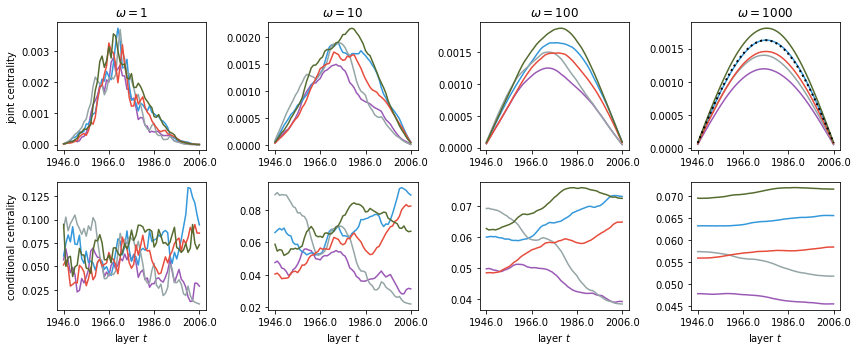

In [25]:
alpha = .85 #pagerank constant
ids = [38,51,77,89,130]# indices of top 5 schools
omegas = [1,10,100,1000]
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#556B2F"]
# flatui = ["#2878B5", "#82B0D2", "#F8AC8C", "#C82423", "#96C37D"]

with sns.color_palette(flatui): 
    plotter2(omegas,alpha,ids,At)
    fname = fig_folder+'/undirected_coupling.png'
    savefig(fname,pad_inches=0.1)
#     savefig("undirected_coupling.jpg")

# Now directed interlayer coupling

In [26]:
def plotter3(omegas,
             alpha,
             gamma,
             ids,
             names,
             Att,
             fig_folder):
    
#     fig = plt.figure(figsize = (10,4))
    fig = plt.figure(figsize = (12,5))
    names = ['joint centrality','conditional centrality']
    
    for i,omega in enumerate(omegas):
        print(omega)
        centrality_function = lambda A: google_matrix(A,alpha=alpha).T
        joints = supraCentrality(M,Att,omega,centrality_function)        
        #joints = supraCentrality(M,Att,omega,alpha)
        marginals,conditionals = get_marginal_and_conditional(joints)

        ax1 = fig.add_subplot(2,len(omegas),i+1)
        ax2 = fig.add_subplot(2,len(omegas),i+1+len(omegas))
        for n in ids:
            ax1.plot(temporal_PhD_graph['layer_names'],joints[n]);        

        ax1.set_xticks(['1946.0','1966.0','1986.0','2006.0']);        
        ax1.set_title('$\omega='+str(omega)+'$');            
        for n in ids:
            ax2.plot(temporal_PhD_graph['layer_names'],conditionals[n]);
            
        ax2.set_xticks(['1946.0','1966.0','1986.0','2006.0']);
        ax2.set_xlabel('layer $t$');
        
        if i==0:
            #ax1.legend(['Harvard', 'MIT', 'Princeton', 'Stanford', 'UC Berkeley']);           
            ax1.set_ylabel(names[0]);
            ax2.set_ylabel(names[1]);  
            
        plt.subplots_adjust(top=0.99, bottom=0.01, left=0.01, right=0.99, hspace=0.25,wspace=0.3)
        plt.tight_layout()
        if i==3:
            x = sparse_power_method(Att)    
            ax1.plot(temporal_PhD_graph['layer_names'],x*mean(joints[51,:])*shape(joints)[1],'k:',linewidth=2)

    fname = fig_folder+'/B_gamma='+str(gamma)+'.png'
    savefig(fname,pad_inches=0.1)
    return



## Directed coupling of time layers

#### This code makes Fig. 4 in book chapter

0.1
(231, 61)
1
(231, 61)
10
(231, 61)
100
(231, 61)


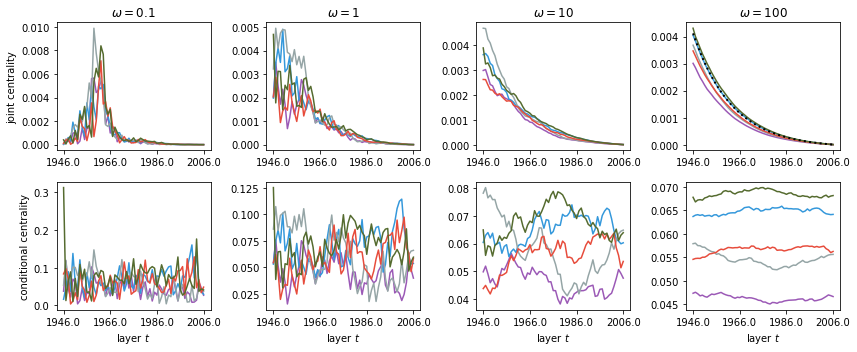

In [27]:
omegas = [.1,1,10,100]
names = ['joint centrality','conditional centrality']
# fig_folder = 'figs'
fig_folder = 'PhD_Exchange_figs'

gamma = .0001
At2 = directed_chain(len(M),gamma)


# with sns.cubehelix_palette(5): 
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#556B2F"]
with sns.color_palette(flatui): 
    plotter3(omegas,alpha,gamma,ids,names,At2,fig_folder)
    fname = fig_folder+'/direct_coupling_gamma=0.0001.png'
    savefig(fname,pad_inches=0.1)
#     savefig("direct_coupling_gamma0.0001.jpg")

0.1
(231, 61)
1
(231, 61)
10
(231, 61)
100
(231, 61)


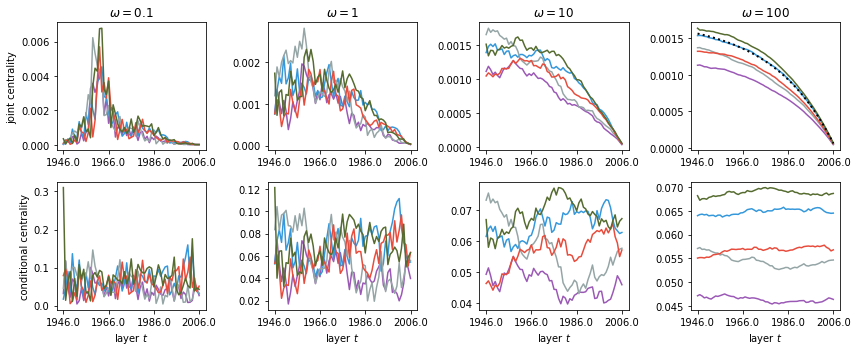

In [28]:
gamma = .001
At2 = directed_chain(len(M),gamma)
# with sns.cubehelix_palette(5): 
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#556B2F"]
with sns.color_palette(flatui): 
    plotter3(omegas,alpha,gamma,ids,names,At2,fig_folder)
    fname = fig_folder+'/direct_coupling_gamma=0.001.png'
    savefig(fname,pad_inches=0.1)
#     savefig("direct_coupling_gamma0.001.jpg")

0.1
(231, 61)
1
(231, 61)
10
(231, 61)
100
(231, 61)


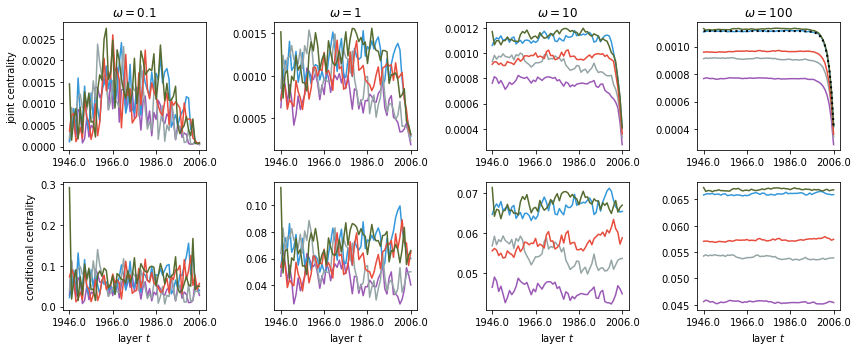

In [29]:
gamma = .01
At2 = directed_chain(len(M),gamma)
# with sns.cubehelix_palette(5): 
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#556B2F"]
with sns.color_palette(flatui): 
    plotter3(omegas,alpha,gamma,ids,names,At2,fig_folder)
    fname = fig_folder+'/direct_coupling_gamma=0.01.png'
    savefig(fname,pad_inches=0.1)
#     savefig("direct_coupling_gamma0.01.jpg")

## Reverse the direction of interlayer coupling

#### This code makes Fig. 5 in book chapter

0.1
(231, 61)
1
(231, 61)
10
(231, 61)
100
(231, 61)


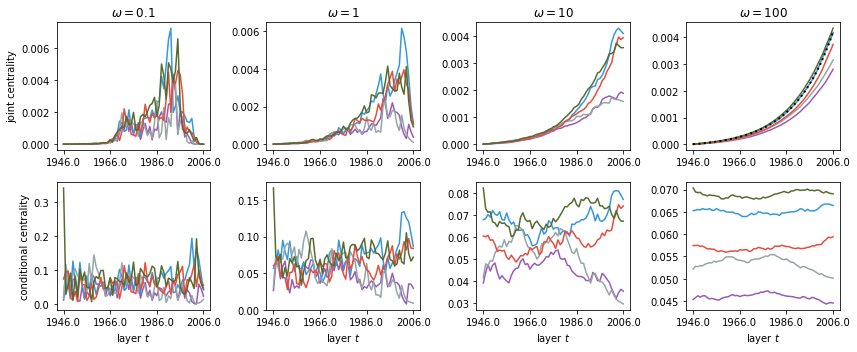

In [30]:
gamma = .0001
At2 = directed_chain(len(M),gamma)
# with sns.cubehelix_palette(5): 
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#556B2F"]
with sns.color_palette(flatui): 
    plotter3(omegas,alpha,gamma,ids,names,At2.T,fig_folder)
    fname = fig_folder+'/reverse_direct_coupling_gamma=0.0001.png'
    savefig(fname,pad_inches=0.1)
#     savefig("reverse_direct_coupling_gamma0.0001.jpg")

0.1
(231, 61)
1
(231, 61)
10
(231, 61)
100
(231, 61)


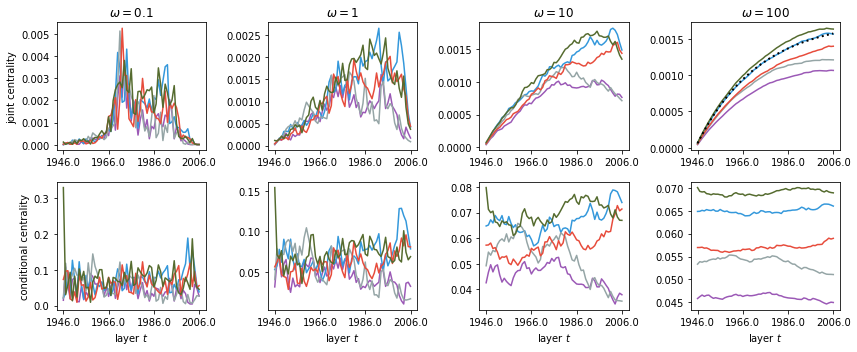

In [31]:
gamma = .001
At2 = directed_chain(len(M),gamma)
# with sns.cubehelix_palette(5): 
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#556B2F"]
with sns.color_palette(flatui): 
    plotter3(omegas,alpha,gamma,ids,names,At2.T,fig_folder)
    fname = fig_folder+'/reverse_direct_coupling_gamma=0.001.png'
    savefig(fname,pad_inches=0.1)

0.1
(231, 61)
1
(231, 61)
10
(231, 61)
100
(231, 61)


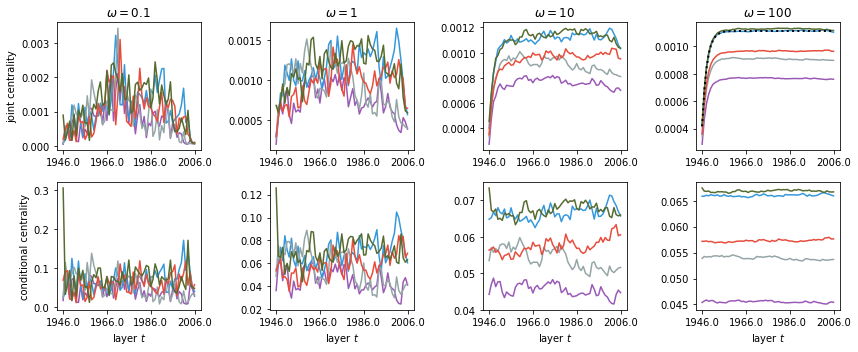

In [32]:
gamma = .01
At2 = directed_chain(len(M),gamma)
# with sns.cubehelix_palette(5):
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#556B2F"]
with sns.color_palette(flatui): 
    plotter3(omegas,alpha,gamma,ids,names,At2.T,fig_folder)
    fname = fig_folder+'/reverse_direct_coupling_gamma=0.01.png'
    savefig(fname,pad_inches=0.1)